### Persistance images from small values

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from ripser import Rips
from persim import PersistenceImager
import glob
import pickle

In [2]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [4]:
# import the data
data = []
for file in glob.glob("./tennessee/results/selected coordinates for each county/*.pkl"):
    with open(file, 'rb') as f:
        data.append(pickle.load(f))

/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [41]:
# add the data(coordinates) to the list - for a single county - multiple variable
data_coordinates_list = []
for variable_name, selected_coordinates in data[7].items():
    data_coordinates = np.array([np.array(coord) for coord in selected_coordinates['coords']])

    print(f"Variable: {variable_name}")
    print(data_coordinates.shape)

    # append the data to the list
    data_coordinates_list.append(data_coordinates)

Variable: EP_DISABL
(80, 2)
Variable: EP_NOHSDP
(0,)
Variable: EP_PCI
(48, 2)
Variable: EP_MOBILE
(112, 2)
Variable: EP_POV
(42, 2)


In [42]:
# selecting single variable to plot
data_ep_pci = data_coordinates_list[2]

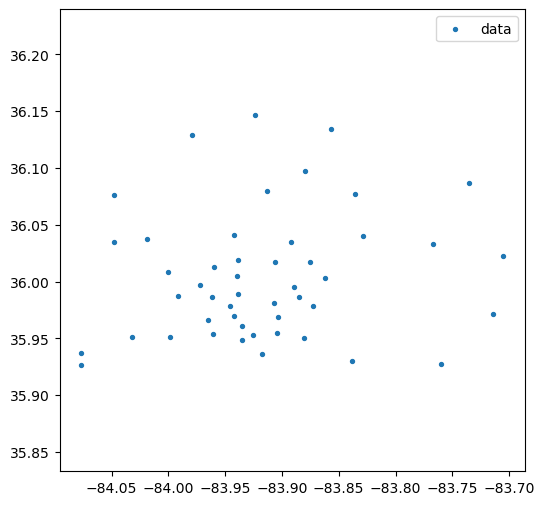

In [43]:
# plot the data_ep_pci for the county
plt.rcParams["figure.figsize"] = (6, 6)
plt.scatter(data_ep_pci[:,0], data_ep_pci[:,1], label="data", s=8)
plt.axis('equal')
plt.legend()
plt.show()

##### Persistance image 

In [10]:
# creating the persistence diagram from rips class
rips = Rips(maxdim=1, coeff=2)
dgms = rips.fit_transform(data_ep_pci)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [11]:
# seperate the diagrams H0 and H1
diagrams_h0 = dgms[0]
diagrams_h1 = dgms[1]

In [15]:
# remove last data point in H0 diagram - it is infinity
diagrams_h0_without_inf = diagrams_h0[0:-1]

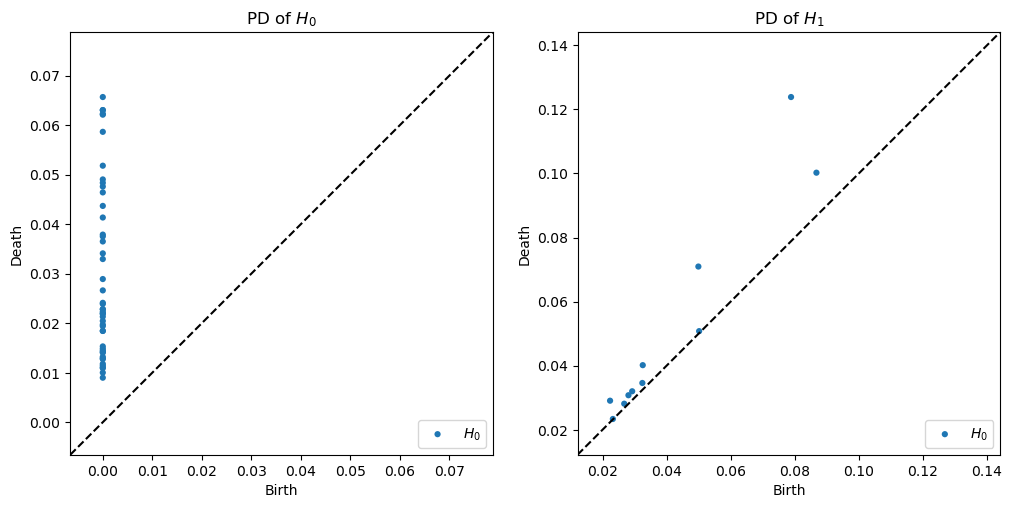

In [44]:
# plotting the persistence diagram of H0 and H1
plt.figure(figsize=(12,6))
plt.subplot(121)

rips.plot(diagrams_h0_without_inf, show=False)
plt.title("PD of $H_0$")

plt.subplot(122)
rips.plot(diagrams_h1, show=False)
plt.title("PD of $H_1$")

plt.show()

In [45]:
# lifetime is y coordinates diagrams_h0_without_inf
# only if used as weight in the persistence imager
lifetime = diagrams_h1[:,1]

In [46]:
# Define custom weighting function that uses lifetime as weight 
# default weight function is 'persistance'
def weight_by_lifetime(birth, persistence, lifetime, **kwargs):
    # Use lifetime as weight
    #return lifetime
    return np.exp(lifetime)

In [19]:
# For the default bivariate normal Gaussian kernel, the parameter controlling the spread (sigma) may be specified 
# either by a float or a 2x2 covariance matrix
# pimgr = PersistenceImager(pixel_size=0.1, weight=weight_by_lifetime, weight_params={'lifetime': lifetime})

##### Persistence image of H1 

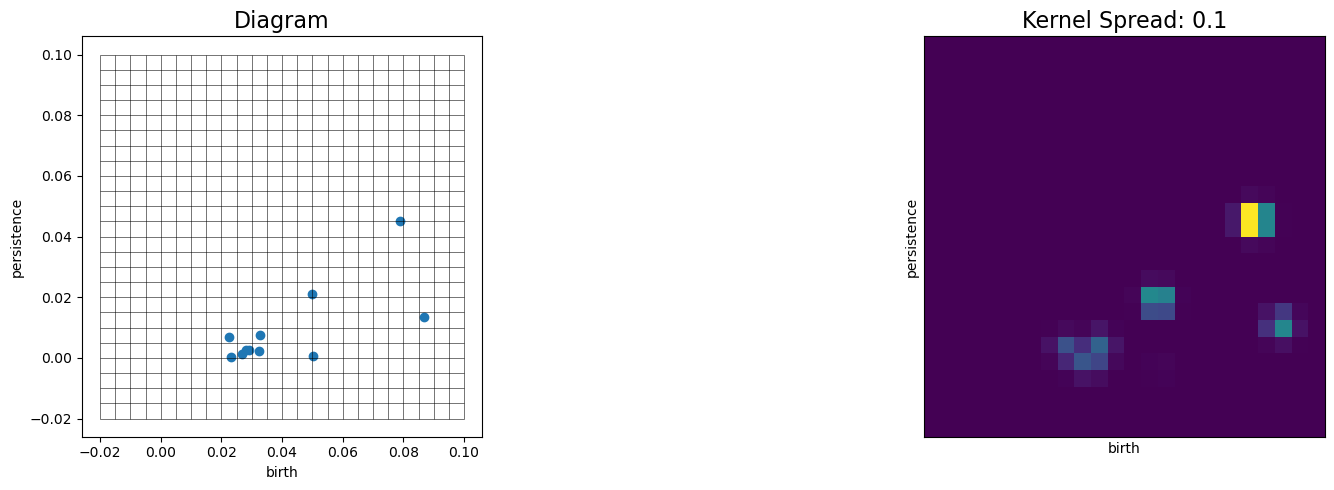

In [47]:
pimgr_1 = PersistenceImager(pixel_size=0.1)
pimgr_1.fit(diagrams_h1)

pimgr_1.pixel_size = 0.005
pimgr_1.birth_range = (-0.02, 0.1)
pimgr_1.pers_range = (-0.02, 0.1)


fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr_1.kernel_params = {'sigma': .1}
pimgr_1.plot_diagram(diagrams_h1, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr_1.kernel_params = {'sigma': 0.000005}
pimgr_1.plot_image(pimgr_1.transform(diagrams_h1), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()

##### Persistence image of H0

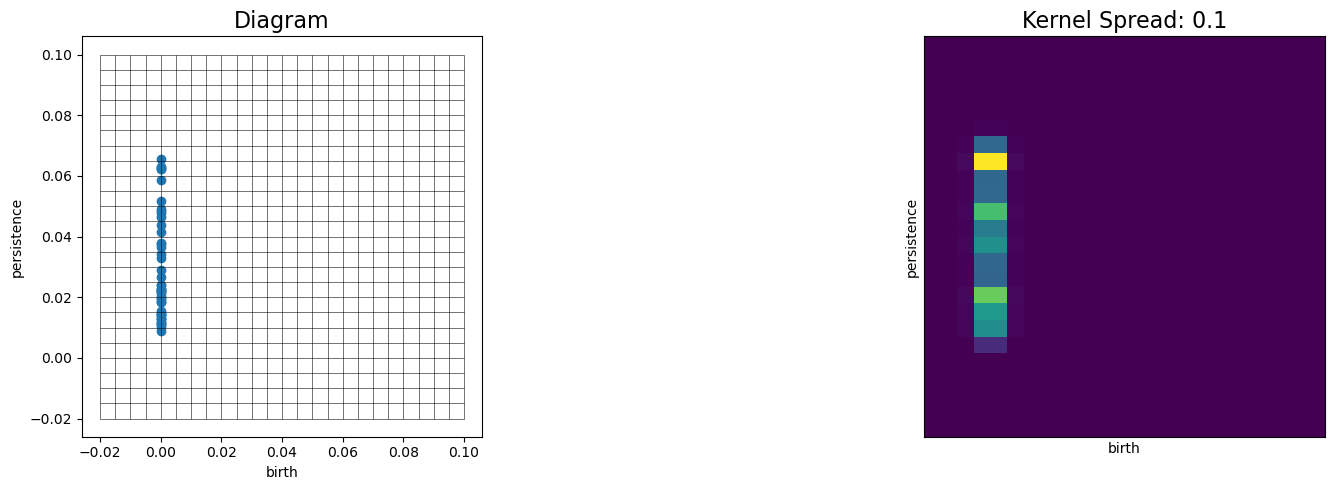

In [21]:
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(diagrams_h0_without_inf)

pimgr.pixel_size = 0.005
pimgr.birth_range = (-0.02, 0.1)
pimgr.pers_range = (-0.02, 0.1)


# pixel size 1 and sigma 0.1
fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagrams_h0_without_inf, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.000005}
pimgr.plot_image(pimgr.transform(diagrams_h0_without_inf), ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()

##### Persistence image of H1+H0 

In [48]:
A = pimgr.transform(diagrams_h0_without_inf)
B = pimgr_1.transform(diagrams_h1)

In [49]:
# add A and B two images by making the shape of the final image 24,24
# just multiply by 8 show the persistance more clearly
C = A +8*B


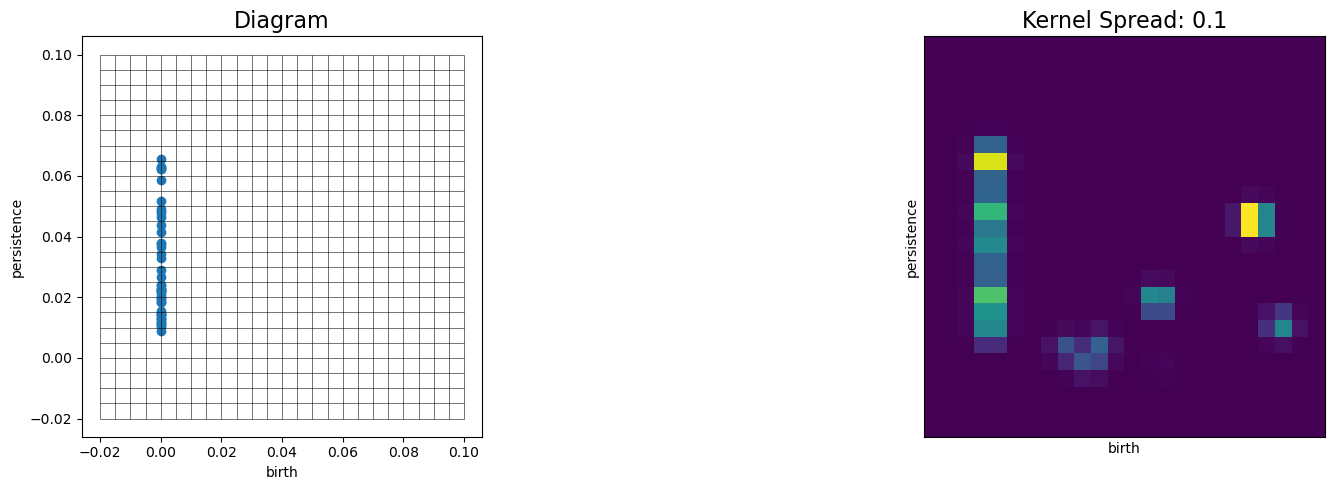

In [50]:
pimgr = PersistenceImager(pixel_size=0.1)
pimgr.fit(diagrams_h0_without_inf)

pimgr.pixel_size = 0.005
pimgr.birth_range = (-0.02, 0.1)
pimgr.pers_range = (-0.02, 0.1)


# pixel size 1 and sigma 0.1
fig, axs = plt.subplots(1, 2, figsize=(20,5))
pimgr.kernel_params = {'sigma': .1}
pimgr.plot_diagram(diagrams_h0_without_inf, skew=True, ax=axs[0])
axs[0].set_title('Diagram', fontsize=16)

pimgr.kernel_params = {'sigma': 0.000005}
pimgr.plot_image(C, ax=axs[1])
axs[1].set_title('Kernel Spread: 0.1', fontsize=16)


plt.tight_layout()
plt.show()

##### Plotting only the persistence image

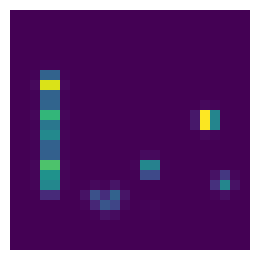

In [70]:

# Rotate 90 degrees to the left(k=3), 90 degrees to the right(k=1), 180 degrees(k=2)
C_rotated = np.rot90(C, k=1) 

plt.figure(figsize=(2.4, 2.4))
plt.imshow(C_rotated, cmap='viridis')  # Assuming 'viridis' colormap, change as needed
plt.axis('off')  # Turn off axis

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters to remove borders
plt.savefig('./tennessee/results/persistence images/test.png')
# plt.close()

# plt.show()
